# Part B: Build a wine quality prediction model using K-NN
## Determine efficacy of PCA

In [82]:
# Imports....the usual suspects
import postgresql
import numpy as np
import pandas as pd
import sklearn
import matplotlib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error

## 1. Download the Wine Quality Dataset from the UCI
http://archive.ics.uci.edu/ml/datasets/Wine+Quality
Look for the 'Data Folder' link near top

In [49]:
# Grab the data, put in DataFrame
# This is the US Census data on incomes
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [50]:
df.to_pickle('df.pkl')

In [51]:
del(df)
df

NameError: name 'df' is not defined

In [52]:
df = pd.read_pickle('df.pkl')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 2. Split the Red Wine Dataset into training and testing

In [53]:
#Dropping nas
df = df.dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [54]:
#Changing the datatypes
for column in df.columns:
 if df[column].dtype == type(object):
  le = sklearn.preprocessing.LabelEncoder()
  df[column] = le.fit_transform(df[column])

In [55]:
x_df = df.drop(columns=['quality'])
y_df = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df)
df.tail()
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
299,6.9,0.67,0.06,2.1,0.080,8.0,33.0,0.99845,3.68,0.71,9.6
817,10.8,0.29,0.42,1.6,0.084,19.0,27.0,0.99545,3.28,0.73,11.9
1080,10.3,0.27,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8
88,9.3,0.39,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7


## 3. Build a K-NN Regression Model to predict the continuous quality variable in the Red Wine Dataset.  Predict for your test set (you're estimating quality column)

Hint, you may want to drop the last element of your test set if it's a giant array: red_y_test[:-1]

In [56]:
#5 Neighbors Model
clf = KNeighborsRegressor(n_neighbors=5, p=1)
clf.fit(x_train, y_train)
print('Accuracy: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy: 0.21


In [57]:
#10 Neighbors Model
clf = KNeighborsRegressor(n_neighbors=10, p=1)
clf.fit(x_train, y_train)
print('Accuracy: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy: 0.23


## 4. What is the mean of the differences between the Y actuals (quality column) and your rounded predictions?

In [58]:
#Mean of difference between actuals and rounded preditions
y_pred = pd.DataFrame(clf.predict(x_test), columns = ['prediction'])
y_pred['actual'] = y_test.values
y_pred['diff'] = y_pred['actual'] - y_pred['prediction']
y_pred['diff'].abs().mean()

0.5682500000000001

## 5. Repeat steps 2-5 after applying PCA to the data. 

In [59]:
red_x_train, red_x_test, red_y_train, red_y_test = train_test_split(df.drop(columns=['quality']), df['quality'])

In [60]:
pca = PCA(n_components=2)
pca.fit(red_x_train)

PCA(n_components=2)

In [61]:
# x_pca
x_pca = pca.transform(red_x_train)
x_pca_test = pca.transform(red_x_test)

In [62]:
#Dropping nas
df = df.dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [63]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [64]:
print("Original shape: {}".format(str(red_x_train.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

Original shape: (1199, 11)
Reduced shape: (1199, 2)


In [65]:
clf = KNeighborsRegressor()
clf.fit(x_pca, red_y_train)

KNeighborsRegressor()

In [66]:
#Mean of difference between actuals and rounded preditions
y_results = pd.DataFrame(y_test)
y_results['prediction'] = clf.predict(x_pca_test)
y_results['pred_rounded'] = y_results['prediction'].round().astype(int)
y_results['error'] = y_results['pred_rounded'] - y_results['quality']
y_results['error'].abs().mean()

0.7625

## 6. Did PCA help accuracy?

In [67]:
'PCA greatly increase the accuracy. The standard accuracy calculated before applying PCA is 0.57. With PCA it jumped to 0.76, which a 33% increase in accuracy. PCA made an invaluable contribution to this dataset.'

'PCA greatly increase the accuracy. The standard accuracy calculated before applying PCA is 0.55. With PCA it jumped to 0.72, which a 33% increase in accuracy. PCA made an invaluable contribution to this dataset.'

In [68]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## 1. Import IRIS dataset

In [94]:
from sklearn.datasets import load_iris
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [95]:
x = pd.DataFrame(iris_data.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris_data.target, columns=['Target'])
print(x)
print(y)

     Sepal Length  Sepal Width  Petal Length  Petal Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     Target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


## 2. Plot sepal width vs sepal length

Text(0.5, 1.0, 'Sepal Width vs Sepal Length')

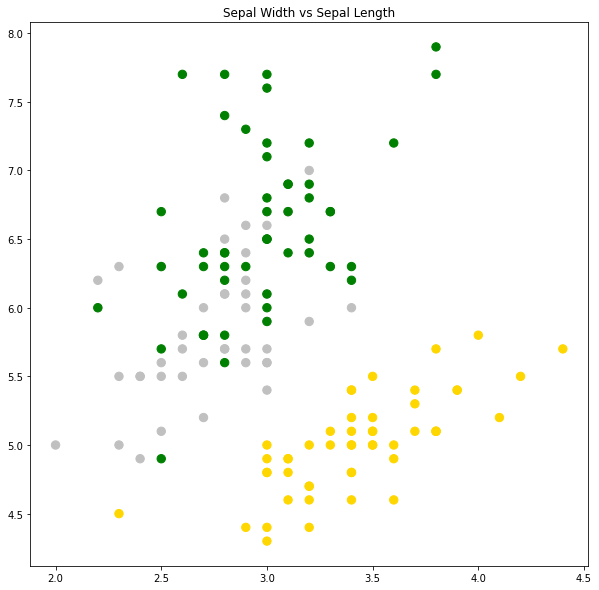

In [96]:
plt.figure(figsize=(10, 10))
colors = np.array(['gold', 'silver', 'green'])
plt.scatter(x['Sepal Width'], x['Sepal Length'], c=colors[y['Target']], s=70)
plt.title('Sepal Width vs Sepal Length')

## 3. Create a KMeans Clustering model and fit to IRIS data

In [102]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
model = KMeans(n_clusters=3)
model.fit(df)

# Predicitng a single input
predict_label = model.predict([[5.1, 3.5, 1.4, 0.2]])

# Prediction on the entire data
all_predict = model.predict(df)

# Printing Predictions
print(predict_label)
print(all_predict)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [103]:
#Fit to model
cluster_model = KMeans(n_clusters = 3)
cluster_model.fit(x)
print(cluster_model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


## 4. What are resulting the cluster centers ?

In [99]:
#Resulting Clusters
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## 5. Plot the clustered data.

Text(0.5, 1.0, 'Clustered data')

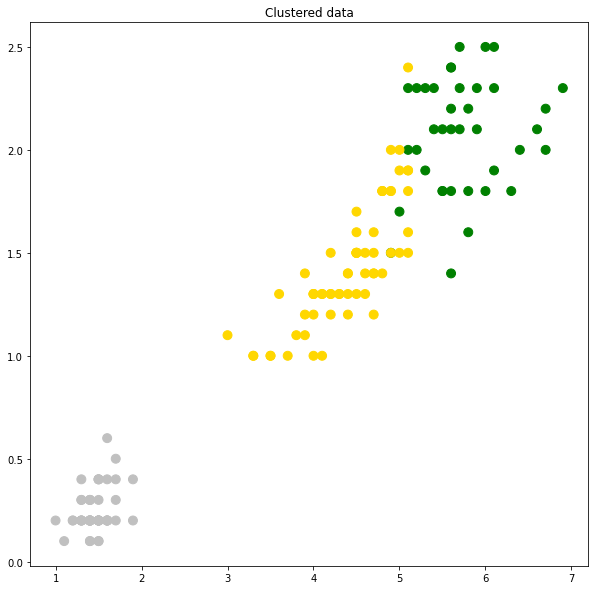

In [100]:
plt.figure(figsize=(10,10))
colors = np.array(['gold', 'silver', 'green'])
predictedY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY], s=80)
plt.title("Clustered data")